# Unsupervised Outlier Detection

In [ ]:
#pip install -U imbalanced-learn
#pip install imblearn

## Importing package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

## Loading dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11710,20011,-14.724627,7.875157,-21.872317,11.906170,-8.348734,-2.262846,-15.833443,0.077874,-6.356833,...,-2.362345,1.099557,1.037199,-1.036359,-0.254777,0.642343,2.161129,-1.401282,1.00,1.0
11711,20012,-2.009341,1.905082,1.446557,-0.917460,0.394477,-0.318634,1.129613,-0.800929,2.111436,...,-0.425917,-0.576998,-0.167463,-0.111614,-0.536490,-0.476895,-2.800340,-1.826252,8.92,0.0
11712,20013,0.985921,-0.109070,1.398819,1.253038,-0.244558,1.457501,-0.960908,0.465983,0.624133,...,-0.108575,-0.053522,0.374352,-0.560566,-0.828896,2.964300,-0.159680,-0.017685,28.50,0.0
11713,20020,1.185392,1.427118,-1.320268,1.870780,1.002901,-1.484138,0.661600,-0.390571,0.702960,...,-0.303643,-0.457902,-0.135351,0.033983,0.742490,-0.325750,0.034874,0.091977,0.89,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11715 entries, 0 to 11714
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11715 non-null  int64  
 1   V1      11715 non-null  float64
 2   V2      11715 non-null  float64
 3   V3      11715 non-null  float64
 4   V4      11715 non-null  float64
 5   V5      11715 non-null  float64
 6   V6      11715 non-null  float64
 7   V7      11715 non-null  float64
 8   V8      11715 non-null  float64
 9   V9      11715 non-null  float64
 10  V10     11715 non-null  float64
 11  V11     11715 non-null  float64
 12  V12     11715 non-null  float64
 13  V13     11715 non-null  float64
 14  V14     11715 non-null  float64
 15  V15     11715 non-null  float64
 16  V16     11715 non-null  float64
 17  V17     11715 non-null  float64
 18  V18     11715 non-null  float64
 19  V19     11715 non-null  float64
 20  V20     11715 non-null  float64
 21  V21     11715 non-null  float64
 22

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,...,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11714.000000,11714.000000,11714.000000,11714.000000
mean,7753.393939,-0.219171,0.275118,0.895362,0.280671,-0.081279,0.139617,-0.114655,-0.051129,0.895920,...,-0.061156,-0.154886,-0.034221,0.017663,0.101935,0.069610,0.007445,0.000543,62.679127,0.004268
std,6005.612654,1.567513,1.306595,1.290721,1.470916,1.187044,1.305273,1.137428,1.236730,1.184268,...,0.902234,0.623952,0.507666,0.591611,0.430050,0.561037,0.407373,0.262717,179.476911,0.065196
min,0.000000,-27.670569,-34.607649,-21.872317,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.555808,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2476.500000,-0.985904,-0.258516,0.416652,-0.616876,-0.683185,-0.621418,-0.585321,-0.185924,0.185483,...,-0.268807,-0.544476,-0.172716,-0.332603,-0.146737,-0.347669,-0.080530,-0.015496,5.000000,0.000000
50%,6368.000000,-0.346351,0.261123,0.949903,0.213915,-0.181220,-0.147786,-0.091393,0.012056,0.883691,...,-0.130069,-0.127932,-0.044411,0.072929,0.140000,0.007669,-0.003793,0.015369,15.950000,0.000000
75%,11972.500000,1.159482,0.887417,1.615644,1.153764,0.347743,0.507980,0.437509,0.266773,1.571493,...,0.022916,0.234877,0.076597,0.402273,0.376817,0.417220,0.107962,0.073872,50.000000,0.000000
max,20023.000000,1.960497,9.067613,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.599543,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


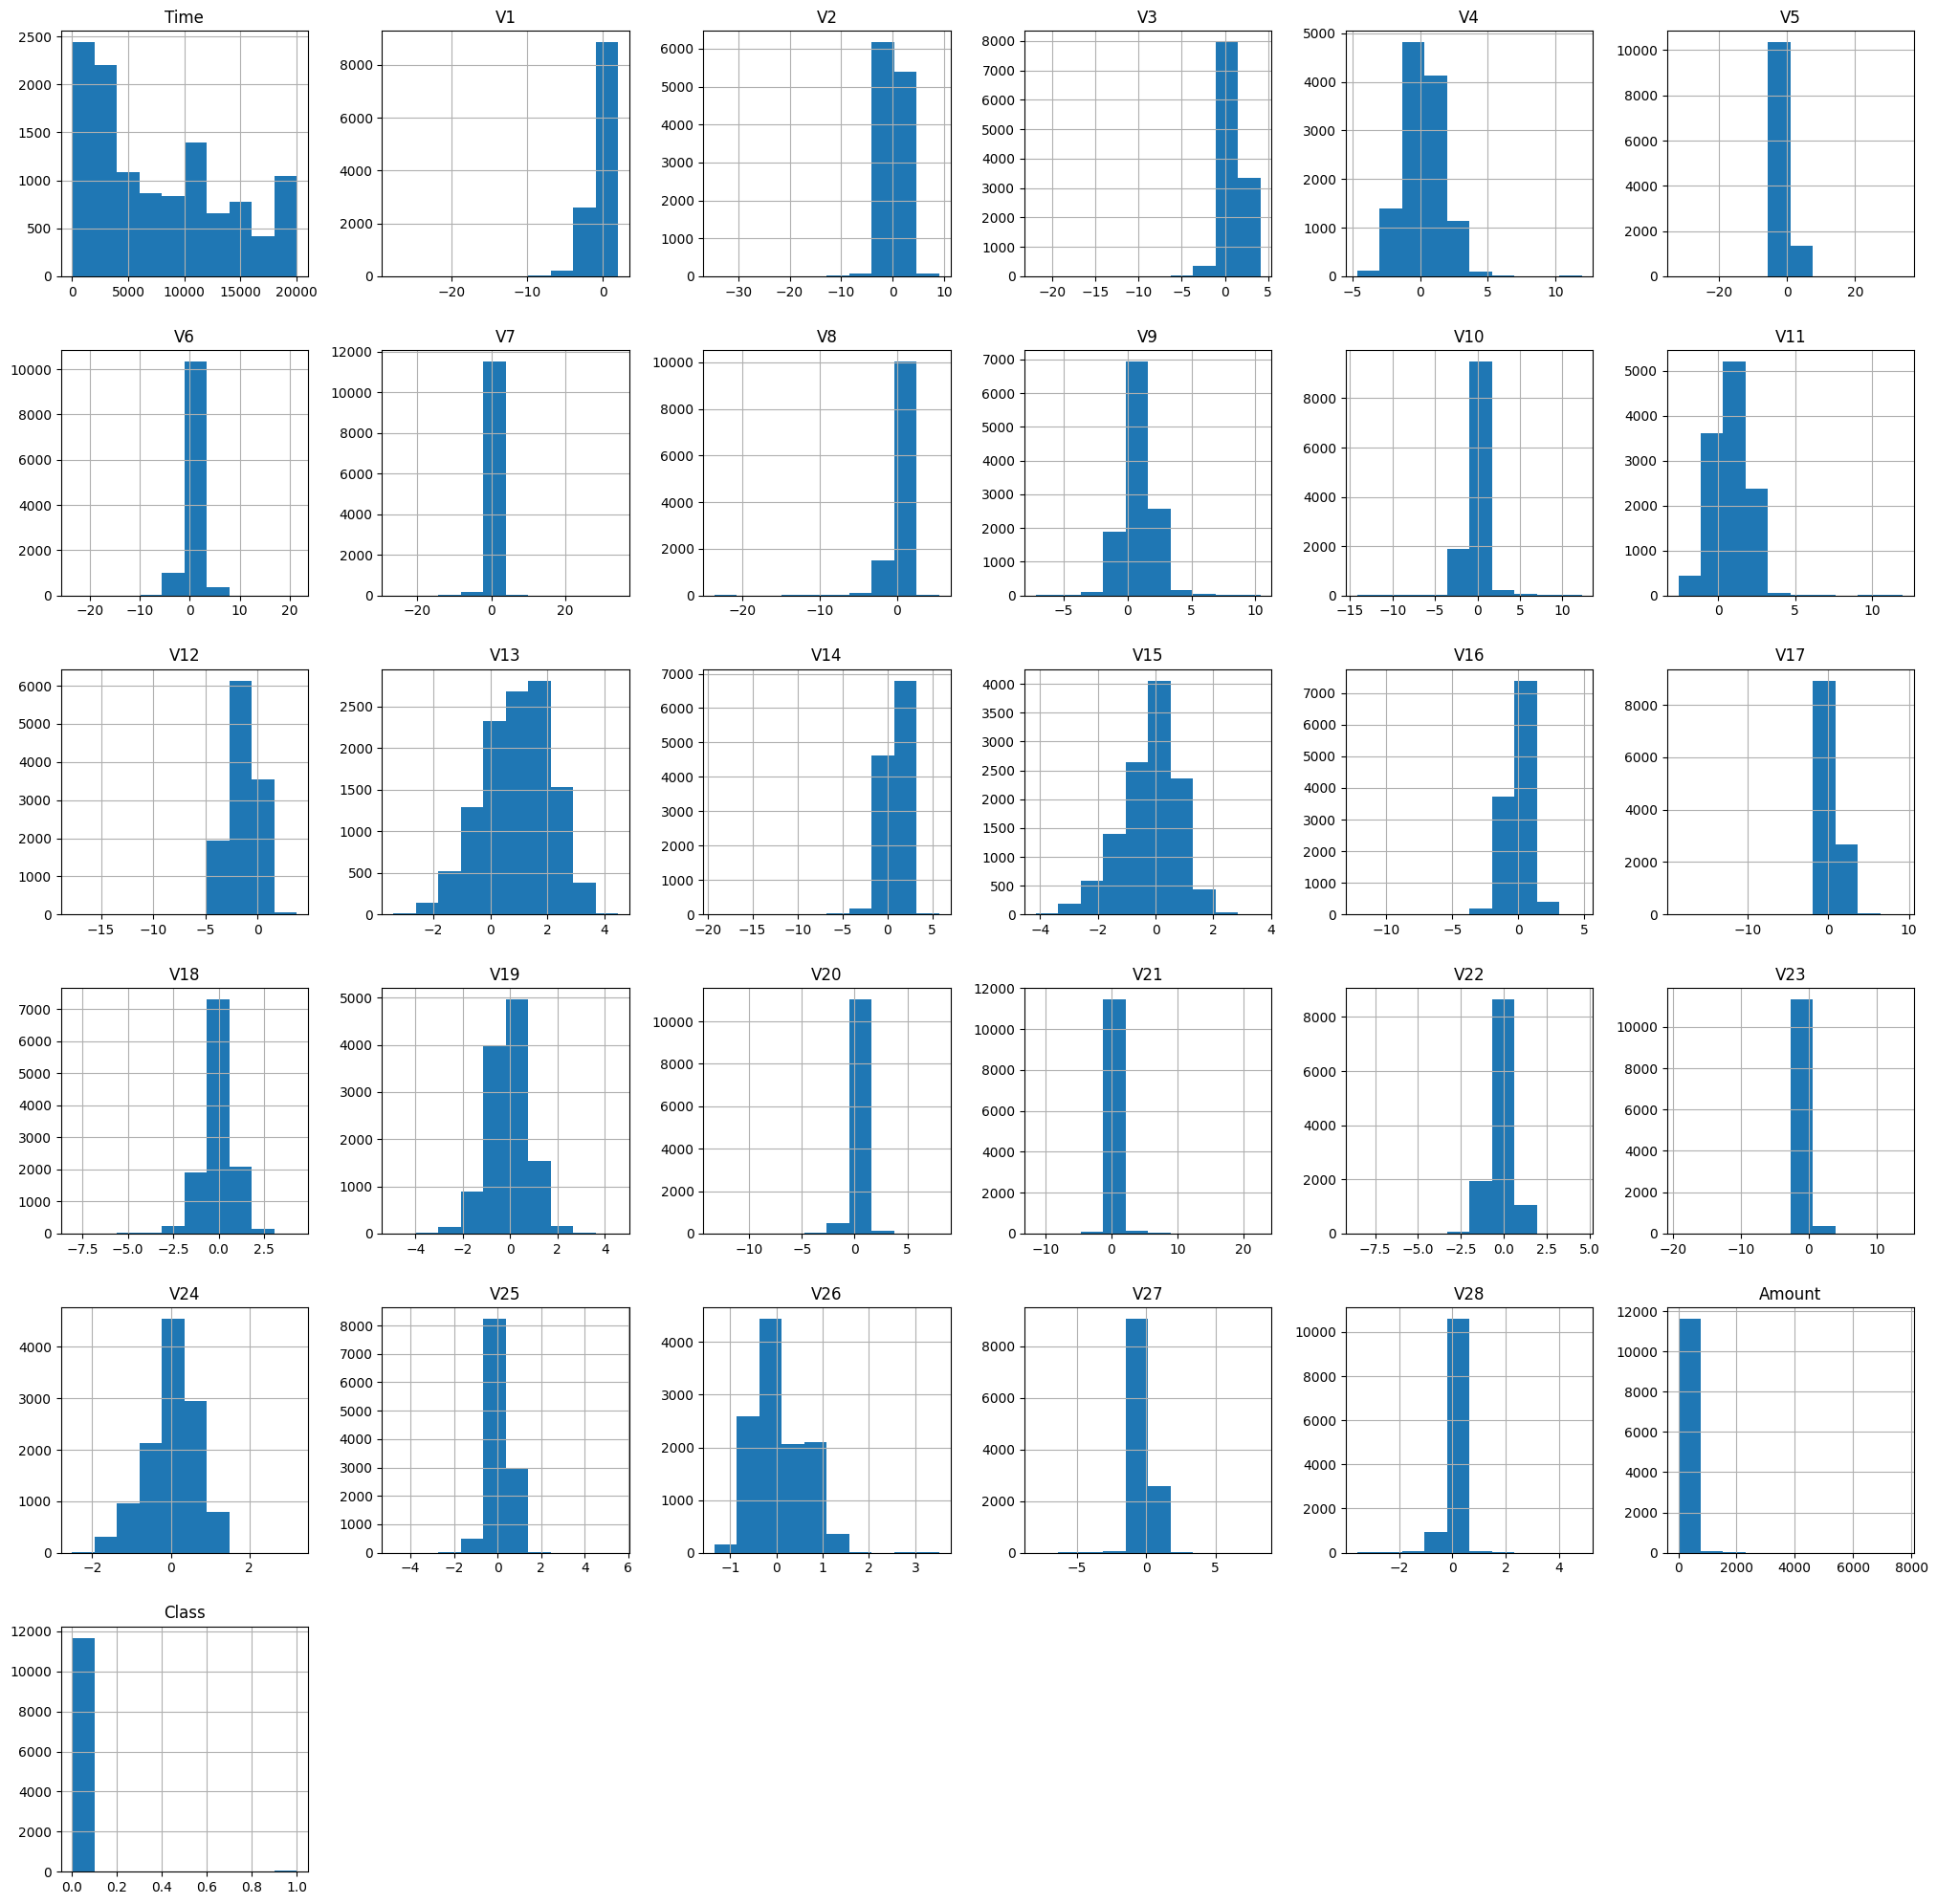

In [7]:
df.hist(figsize = (25,25))
plt.show()

In [8]:
Fraud = df[df['Class'] == 1]
Fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
6331,7526,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0
6336,7543,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1.0
6338,7551,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1.0
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0


In [9]:
Valid = df[df['Class'] == 0]
Valid

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11708,20004,1.290011,-0.377393,0.279862,-0.559592,-0.635778,-0.598677,-0.303825,-0.244093,-0.091581,...,-0.971156,-2.267693,0.277959,-0.079723,-0.158788,0.472774,-0.102527,0.003595,55.95,0.0
11709,20006,-0.801284,0.511641,2.634093,-1.779266,-0.224219,-0.167005,0.371935,-0.161521,2.588168,...,-0.115433,0.229698,-0.357389,0.034548,0.384686,-0.826157,-0.195279,-0.159313,11.85,0.0
11711,20012,-2.009341,1.905082,1.446557,-0.917460,0.394477,-0.318634,1.129613,-0.800929,2.111436,...,-0.425917,-0.576998,-0.167463,-0.111614,-0.536490,-0.476895,-2.800340,-1.826252,8.92,0.0
11712,20013,0.985921,-0.109070,1.398819,1.253038,-0.244558,1.457501,-0.960908,0.465983,0.624133,...,-0.108575,-0.053522,0.374352,-0.560566,-0.828896,2.964300,-0.159680,-0.017685,28.50,0.0


In [10]:
print(len(Fraud))
print(len(Valid))

50
11664


## Outlier Fraction

In [27]:
outlier_fraction = len(Fraud)/float(len(Valid))
outlier_fraction

0.0042866941015089165

In [12]:
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

Fraud Cases: 50
Valid Transactions: 11664


## Corelation Coefficient

In [13]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.056240,-0.016178,0.013326,0.091316,-0.079161,-0.010911,-0.146295,0.012123,0.427170,...,-0.031299,0.003601,0.003969,-0.022676,0.053401,0.074126,-0.037402,-0.017603,-0.019090,0.037775
V1,0.056240,1.000000,-0.163925,0.008054,-0.001611,-0.144374,0.037337,0.043896,0.195500,-0.051686,...,-0.116796,-0.025846,-0.085889,-0.010152,0.250618,0.010791,-0.112482,0.077239,-0.184272,-0.128600
V2,-0.016178,-0.163925,1.000000,-0.179825,0.104240,-0.074142,0.008482,0.058860,-0.155356,-0.113130,...,0.142151,-0.123161,0.044341,-0.032194,-0.160202,-0.053220,0.040799,-0.028712,-0.443595,0.190976
V3,0.013326,0.008054,-0.179825,1.000000,-0.085568,0.037197,-0.100657,0.294893,-0.037451,0.215363,...,-0.019548,0.229688,0.002456,0.026975,-0.148268,0.036077,-0.158861,-0.048479,-0.147164,-0.432331
V4,0.091316,-0.001611,0.104240,-0.085568,1.000000,-0.112266,-0.002488,-0.149492,0.046057,-0.198197,...,-0.016144,0.000772,-0.011889,-0.051234,-0.065985,0.057370,0.027043,0.006103,0.121276,0.262467
V5,-0.079161,-0.144374,-0.074142,0.037197,-0.112266,1.000000,0.137008,-0.044462,0.072701,-0.040528,...,-0.043736,-0.117869,-0.042502,0.019799,-0.022367,-0.104915,-0.018193,-0.112090,-0.380621,-0.110241
V6,-0.010911,0.037337,0.008482,-0.100657,-0.002488,0.137008,1.000000,-0.002576,-0.010500,0.005521,...,0.072342,-0.059870,0.020767,0.027150,0.079682,-0.035423,-0.068965,-0.009579,0.219750,-0.106119
V7,-0.146295,0.043896,0.058860,0.294893,-0.149492,-0.044462,-0.002576,1.000000,0.119026,0.022190,...,-0.140434,0.058485,0.067380,0.009738,-0.062976,-0.085648,-0.161301,-0.043332,0.291461,-0.299334
V8,0.012123,0.195500,-0.155356,-0.037451,0.046057,0.072701,-0.010500,0.119026,1.000000,-0.088388,...,-0.343050,0.171074,-0.069596,0.018463,0.011144,0.020171,0.048234,0.081808,-0.067007,0.053501
V9,0.427170,-0.051686,-0.113130,0.215363,-0.198197,-0.040528,0.005521,0.022190,-0.088388,1.000000,...,-0.004280,0.029160,0.005443,0.009149,0.155949,0.083429,-0.069452,-0.083430,-0.010575,-0.192517


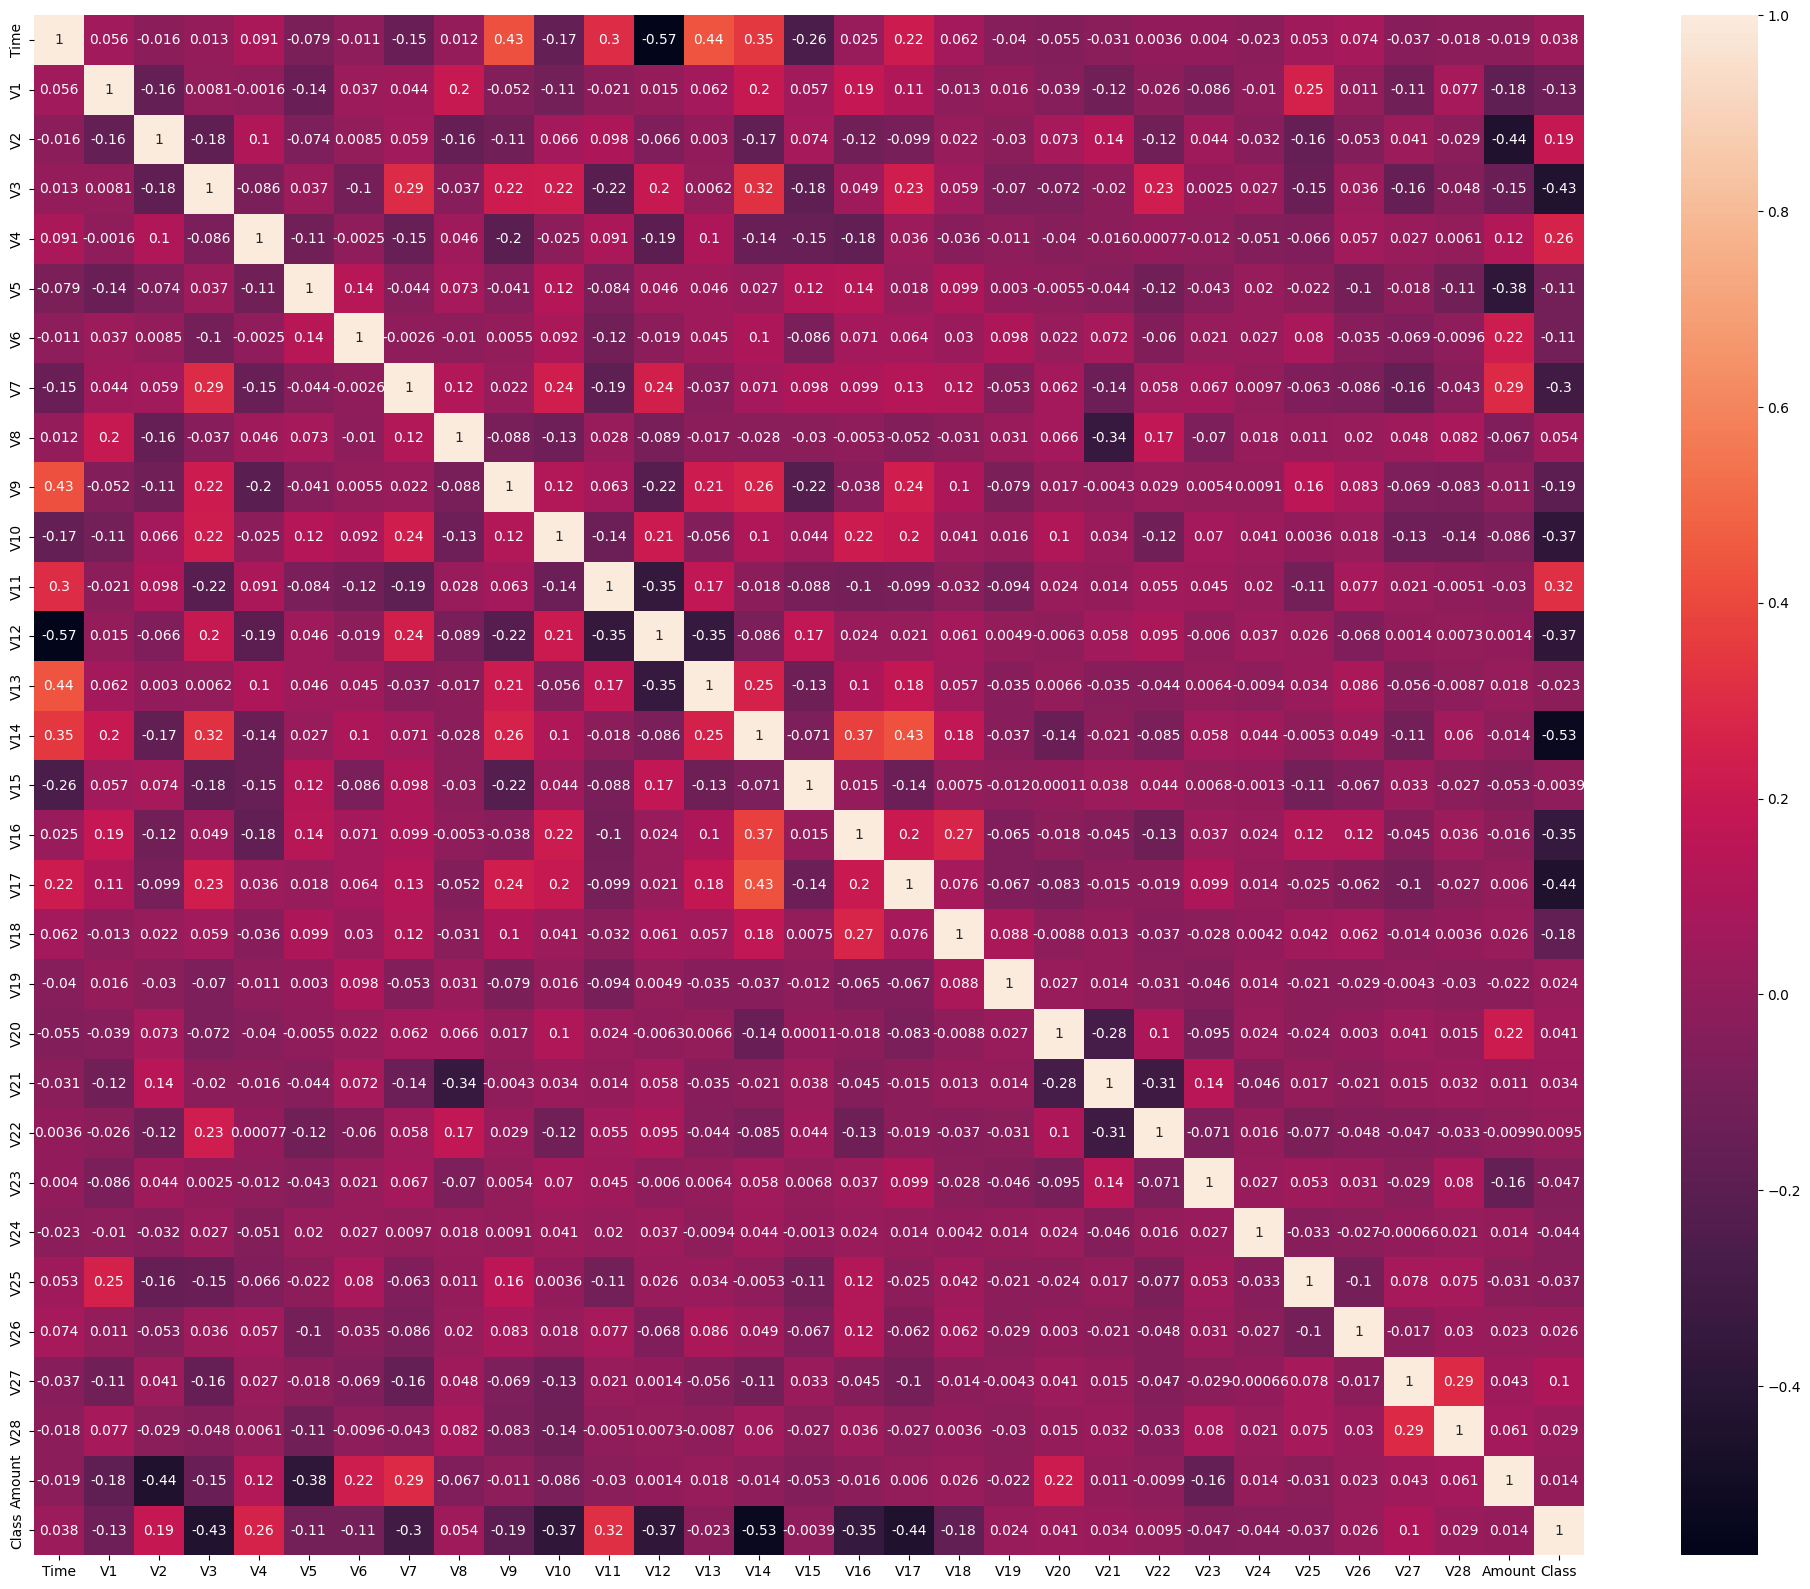

In [15]:
plt.figure(figsize = (25,20))
sb.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [17]:
x.shape

(11715, 30)

In [18]:
y.shape

(11715,)

## Splitting the dataset into train and test

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [20]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [22]:
classifier = {
    "Isolation Forest": IsolationForest(max_samples = len(x), contamination='outlier_fraction', random_state=1),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination='outlier_fraction')
}

In [23]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

<Figure size 900x700 with 0 Axes>

In [28]:
for i, (clf_name, clf) in enumerate(classifier.items()):

    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)

InvalidParameterError: ignored

## Prediction

In [ ]:
# Reshape the prediction values to 0 for valid, 1 for fraud.
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != y).sum()

In [ ]:
print(n_errors)

## Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Confusion Matrix

In [ ]:
confusion_matrix(y_test,y_pred)

### Classification Report

In [ ]:
print(classification_report(y_test,y_pred))

### Accuracy Score

In [ ]:
accuracy_score(y_test,y_pred)